In [1]:
import pandas as pd

#import data
file_name = "bankrupt_data.csv"

In [2]:
df = pd.read_csv(filepath_or_buffer = file_name, encoding = 'latin-1')

In [3]:
#check row and columns
df.shape

(6819, 96)

In [4]:
#check if there are missing values
df.info()
#There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

In [5]:
#check if there are duplicated values
df.duplicated().sum()

0

In [6]:
#method1 to check how many companies went bankrupt
count = df['Bankrupt?'].value_counts(sort = False)
count

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [7]:
#calculate percentage of bankruptcy
percent = lambda part, whole: float(part) / float(whole) * 100
no_bankruptcy = percent(count.loc[0],len(df))
yes_bankruptcy = percent(count.loc[1],len(df))
print(no_bankruptcy, yes_bankruptcy)

96.77372048687491 3.2262795131250916


In [8]:
#remove space from columns

a = df.columns.tolist()
a = [x.strip(' ') for x in a]

df.columns = a

df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'operating gross margin', 'realized sales gross margin',
       'operating profit rate', 'tax Pre-net interest rate',
       'after-tax net interest rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating expense rate',
       'research and development expense rate', 'cash flow rate',
       'interest-bearing debt interest rate', 'tax rate (A)',
       'per Net Share Value (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan)',
       'Operating Profit Per Share (Yuan)',
       'Per Share Net profit before tax (yuan)',
       'realized sales gross profit growth rate',
       'operating profit growth rate', 'after-tax net p

net income to total assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
net worth/assets                                          -0.250161
                                                             ...   
current liabilities to current assets                      0.171306
borrowing dependency                                       0.176543
current liability to assets                                0.194494
equity to liability                                       -0.083048
debt ratio %                                               0.250161
Length: 95, dtype: float64


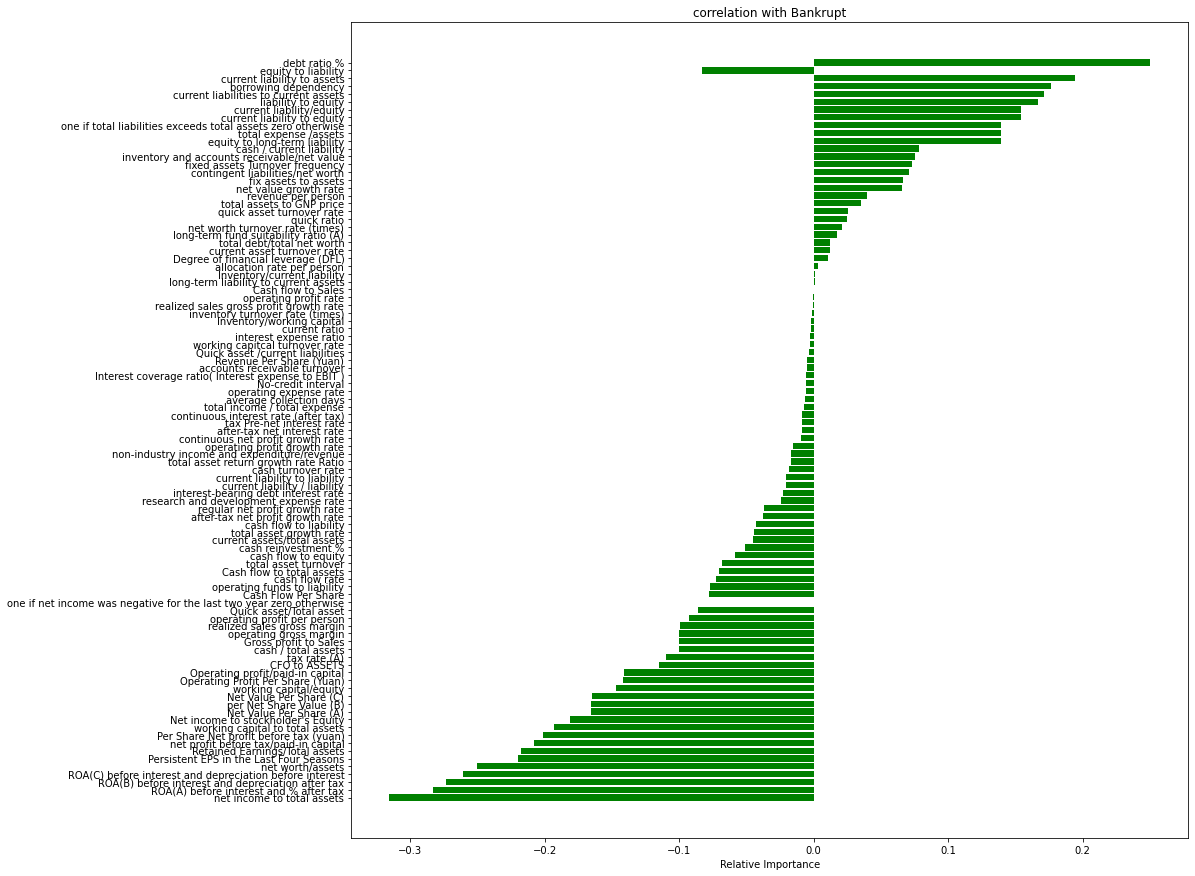

In [9]:
#Since we have too many features, we will select some features that are meaningful using one of the feature selection methods, filter method.

#step1. Remove the features that have a low correlation with the target value.

import numpy as np 
import matplotlib.pyplot as plt

X = df.iloc[:,1:]
y = df['Bankrupt?']

importances = X.apply(lambda x:x.corr(y))
indices = np.argsort(importances)
print(importances[indices])

names= df.columns[1:]

plt.figure(figsize = (15, 15))

plt.title('correlation with Bankrupt')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
#We will save the features that have a correlation higher than the absolute value of 0.10. Therefore, I will set the treshold to the absolute value of 0.10.
a = []

for i in range(0, len(indices)):
    if np.abs(importances[i])>0.10:     
        a.append(names[i])
        print(names[i])

print(len(a))

X = df.loc[:, a]

ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
operating gross margin
tax rate (A)
per Net Share Value (B)
Net Value Per Share (A)
Net Value Per Share (C)
Persistent EPS in the Last Four Seasons
Operating Profit Per Share (Yuan)
Per Share Net profit before tax (yuan)
debt ratio %
net worth/assets
borrowing dependency
Operating profit/paid-in capital
net profit before tax/paid-in capital
working capital to total assets
cash / total assets
current liability to assets
working capital/equity
current liability/equity
Retained Earnings/Total assets
total expense /assets
current liability to equity
equity to long-term liability
CFO to ASSETS
current liabilities to current assets
one if total liabilities exceeds total assets zero otherwise
net income to total assets
Gross profit to Sales
Net income to stockholder's Equity
liability to equity
32


In [11]:
#Step2: Remove the features that have a correlation higher than 90% with other independent variables.

corr = X.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = X.columns[columns]

print(len(selected_columns))
#Now we only have 21 features. I will create a new df with these selected columns and the features that I think it's important.

new_df = pd.concat([df[['Bankrupt?', 'net income to total assets', 'Cash flow to total assets', 'tax Pre-net interest rate', 'inventory and accounts receivable/net value']],X[selected_columns]], axis=1)
print(new_df.columns)
print(new_df.shape)

#We have 25 features and target.

21
Index(['Bankrupt?', 'net income to total assets', 'Cash flow to total assets',
       'tax Pre-net interest rate',
       'inventory and accounts receivable/net value',
       'ROA(C) before interest and depreciation before interest',
       'operating gross margin', 'tax rate (A)', 'per Net Share Value (B)',
       'Persistent EPS in the Last Four Seasons',
       'Operating Profit Per Share (Yuan)', 'debt ratio %', 'net worth/assets',
       'borrowing dependency', 'working capital to total assets',
       'cash / total assets', 'current liability to assets',
       'working capital/equity', 'current liability/equity',
       'Retained Earnings/Total assets', 'total expense /assets',
       'equity to long-term liability', 'CFO to ASSETS',
       'current liabilities to current assets',
       'one if total liabilities exceeds total assets zero otherwise',
       'Net income to stockholder's Equity'],
      dtype='object')
(6819, 26)


In [12]:
#split the dataset into training and test sets
from sklearn.model_selection import KFold, StratifiedKFold

x = new_df.iloc[:,1:]
y = new_df['Bankrupt?']

#use K-fold function to split data. 80% of the data will be training set and the rest of it will be test set.
skf = StratifiedKFold(n_splits = 5, shuffle = False)

for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    original_xtrain, original_xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

TRAIN: [1104 1118 1132 ... 6816 6817 6818] TEST: [   0    1    2 ... 1383 1384 1385]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [1104 1118 1132 ... 2796 2797 2798]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [1860 1861 1862 ... 4136 4137 4138]
TRAIN: [   0    1    2 ... 6816 6817 6818] TEST: [2100 2147 2148 ... 5475 5476 5477]
TRAIN: [   0    1    2 ... 5475 5476 5477] TEST: [3749 3908 4071 ... 6816 6817 6818]


In [13]:
import numpy as np 

#check if the percentage of bankruptcy is similar between the train set and the test set 
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

#The distribution of bankruptcy is similar to the original dataset.

[0.96774194 0.03225806]
[0.96771827 0.03228173]


In [14]:
#export a training set and a test set as csv
original_xtrain.to_csv(r'C:\Users\jeongjaehui\Documents\Stats_404\JEONG-JAEHEE\bankrupt_training_set.csv', index = False, header=True)
original_xtest.to_csv(r'C:\Users\jeongjaehui\Documents\Stats_404\JEONG-JAEHEE\bankrupt_test_set.csv', index = False, header=True)

In [15]:
original_xtrain.shape

(5456, 25)

(5456, 26)


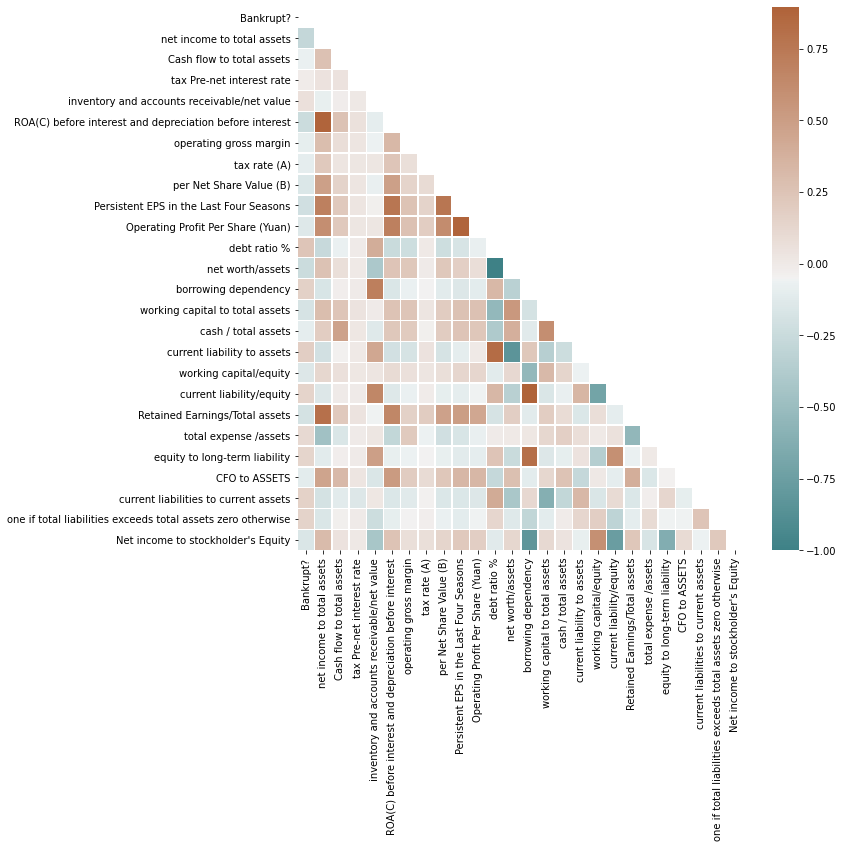

In [16]:
#perform EDA

#create a correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.concat([original_ytrain, original_xtrain], axis = 1)
print(df2.shape)

plt.figure(figsize = (10, 10))

#using mask to have a triangle correlation heatmap
#mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
corr = np.corrcoef(np.random.randn(26, 676))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#set the color of the heatmap
cmap = sns.diverging_palette(200, 30, as_cmap=True)
sns.heatmap(df2.corr(), mask = mask, cmap = cmap, linewidths=.5)
plt.show()

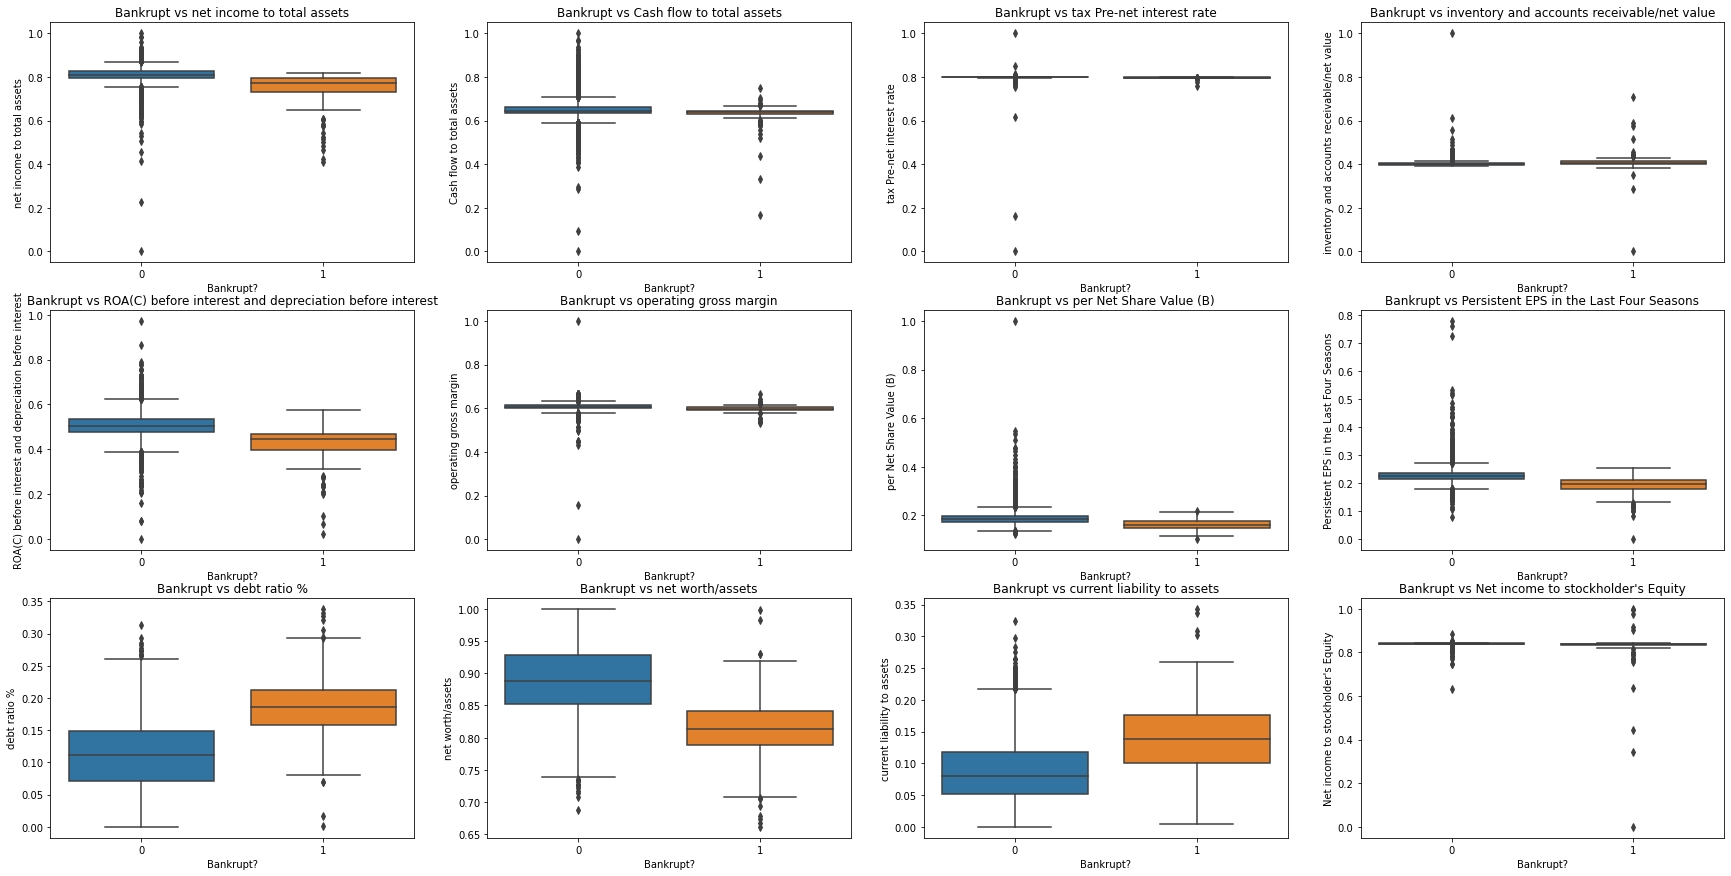

In [17]:
#plot feature with an interesting correlation

fig , ax = plt.subplots(nrows=3, ncols = 4, figsize=(30,15))

sns.boxplot(x='Bankrupt?', y="net income to total assets", data=df2, ax=ax[0,0])
ax[0,0].set_title('Bankrupt vs net income to total assets')

sns.boxplot(x='Bankrupt?', y="Cash flow to total assets", data=df2, ax=ax[0,1])  
ax[0,1].set_title('Bankrupt vs Cash flow to total assets') 

sns.boxplot(x='Bankrupt?', y="tax Pre-net interest rate", data=df2, ax=ax[0,2])
ax[0,2].set_title('Bankrupt vs tax Pre-net interest rate')

sns.boxplot(x='Bankrupt?', y="inventory and accounts receivable/net value", data=df2, ax=ax[0,3]) 
ax[0,3].set_title('Bankrupt vs inventory and accounts receivable/net value')

###

sns.boxplot(x='Bankrupt?', y="ROA(C) before interest and depreciation before interest", data=df2, ax=ax[1,0])
ax[1,0].set_title('Bankrupt vs ROA(C) before interest and depreciation before interest')

sns.boxplot(x='Bankrupt?', y="operating gross margin", data=df2, ax=ax[1,1])  
ax[1,1].set_title('Bankrupt vs operating gross margin') 

sns.boxplot(x='Bankrupt?', y="per Net Share Value (B)", data=df2, ax=ax[1,2])
ax[1,2].set_title('Bankrupt vs per Net Share Value (B)')

sns.boxplot(x='Bankrupt?', y="Persistent EPS in the Last Four Seasons", data=df2, ax=ax[1,3]) 
ax[1,3].set_title('Bankrupt vs Persistent EPS in the Last Four Seasons')

###

sns.boxplot(x='Bankrupt?', y="debt ratio %", data=df2, ax=ax[2,0])
ax[2,0].set_title('Bankrupt vs debt ratio %')

sns.boxplot(x='Bankrupt?', y="net worth/assets", data=df2, ax=ax[2,1])  
ax[2,1].set_title('Bankrupt vs net worth/assets') 

sns.boxplot(x='Bankrupt?', y="current liability to assets", data=df2, ax=ax[2,2])
ax[2,2].set_title('Bankrupt vs current liability to assets')

sns.boxplot(x='Bankrupt?', y="Net income to stockholder's Equity", data=df2, ax=ax[2,3]) 
ax[2,3].set_title('Bankrupt vs Net income to stockholder\'s Equity')

plt.show()

/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongjaehui/opt/anaconda3/envs/env-stats404-w20/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

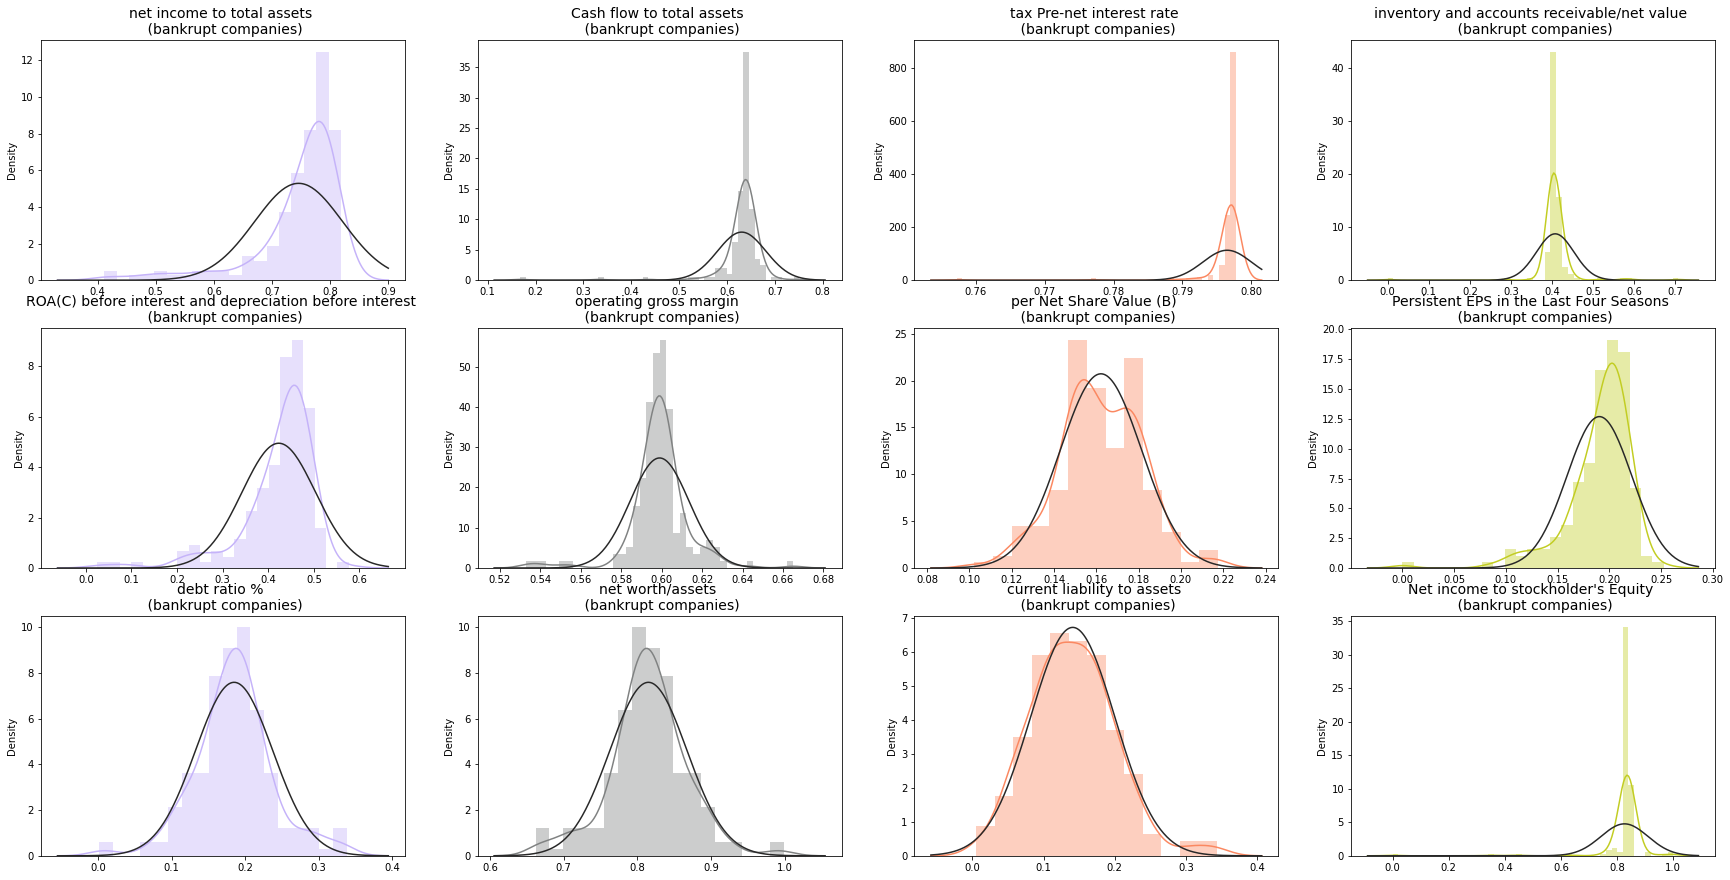

In [18]:
#plot the festure distributions for bankrupt companies

from scipy.stats import norm

fig, ax = plt.subplots(3,4, figsize=(30, 15))

debt_ratio = df2['net income to total assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[0,0], fit=norm, color='#C5B3F9')
ax[0,0].set_title('net income to total assets \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2['Cash flow to total assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[0,1], fit=norm, color='#808282')
ax[0,1].set_title('Cash flow to total assets \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2['tax Pre-net interest rate'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[0,2], fit=norm, color='#FB8861')
ax[0,2].set_title('tax Pre-net interest rate \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2['inventory and accounts receivable/net value'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[0,3], fit=norm, color='#C2CD23')
ax[0,3].set_title('inventory and accounts receivable/net value \n (bankrupt companies)', fontsize=14)

###

debt_ratio = df2['ROA(C) before interest and depreciation before interest'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[1,0], fit=norm, color='#C5B3F9')
ax[1,0].set_title('ROA(C) before interest and depreciation before interest \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2['operating gross margin'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[1,1], fit=norm, color='#808282')
ax[1,1].set_title('operating gross margin \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2['per Net Share Value (B)'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[1,2], fit=norm, color='#FB8861')
ax[1,2].set_title('per Net Share Value (B) \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2['Persistent EPS in the Last Four Seasons'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[1,3], fit=norm, color='#C2CD23')
ax[1,3].set_title('Persistent EPS in the Last Four Seasons \n (bankrupt companies)', fontsize=14)

###

debt_ratio = df2['debt ratio %'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax[2,0], fit=norm, color='#C5B3F9')
ax[2,0].set_title('debt ratio % \n (bankrupt companies)', fontsize=14)

net_worth_assets = df2['net worth/assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax[2,1], fit=norm, color='#808282')
ax[2,1].set_title('net worth/assets \n (bankrupt companies)', fontsize=14)

cash_flow_rate = df2['current liability to assets'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax[2,2], fit=norm, color='#FB8861')
ax[2,2].set_title('current liability to assets \n (bankrupt companies)', fontsize=14)

tot_debt_net = df2['Net income to stockholder\'s Equity'].loc[df2['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax[2,3], fit=norm, color='#C2CD23')
ax[2,3].set_title('Net income to stockholder\'s Equity \n (bankrupt companies)', fontsize=14)

plt.show()

In [19]:
#splite the data into training and valiation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(original_xtrain, original_ytrain, test_size = 0.1, random_state = 1,stratify = original_ytrain, shuffle = True)

In [20]:
#use GridSearch CV to find the best parameters

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

'''
#find the best parameters

clf = CatBoostClassifier()

params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42],
          'scale_pos_weight': [29]
         }

          
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator = clf, param_grid = params, scoring = scorer, cv = 3)


clf_grid.fit(original_xtrain, original_ytrain)
best_param = clf_grid.best_params_
best_paramn)
'''






"\n#find the best parameters\n\nclf = CatBoostClassifier()\n\nparams = {'iterations': [500],\n          'depth': [4, 5, 6],\n          'loss_function': ['Logloss'],\n          'l2_leaf_reg': np.logspace(-20, -19, 3),\n          'leaf_estimation_iterations': [10],\n#           'eval_metric': ['Accuracy'],\n#           'use_best_model': ['True'],\n          'logging_level':['Silent'],\n          'random_seed': [42],\n          'scale_pos_weight': [29]\n         }\n\n          \nscorer = make_scorer(accuracy_score)\nclf_grid = GridSearchCV(estimator = clf, param_grid = params, scoring = scorer, cv = 3)\n\n\nclf_grid.fit(original_xtrain, original_ytrain)\nbest_param = clf_grid.best_params_\nbest_paramn)\n"

In [21]:

#fit the best model
cat = CatBoostClassifier(iterations=500,
                           loss_function='Logloss',
                           depth=6,
                           l2_leaf_reg=1e-20,
                           eval_metric='Accuracy',
                           leaf_estimation_iterations=10,
                           use_best_model=True,
                           logging_level='Silent',
                           random_seed=42,
                           class_weights = (1, 30)
                          )
                          
cat_model = cat.fit(x_train,y_train, eval_set = (x_val,y_val))


In [22]:
cat_pred = cat_model.predict(x_val)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_val, cat_pred))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(y_val, cat_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       528
           1       0.19      0.89      0.31        18

    accuracy                           0.87       546
   macro avg       0.59      0.88      0.62       546
weighted avg       0.97      0.87      0.91       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 460                  68
Actual Positive                   2                  16


In [24]:
cat_pred = cat_model.predict(original_xtest)

print(classification_report(original_ytest, cat_pred))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(original_ytest, cat_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1319
           1       0.26      0.84      0.39        44

    accuracy                           0.92      1363
   macro avg       0.62      0.88      0.67      1363
weighted avg       0.97      0.92      0.94      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1211                 108
Actual Positive                   7                  37


(0.0, 1.0)

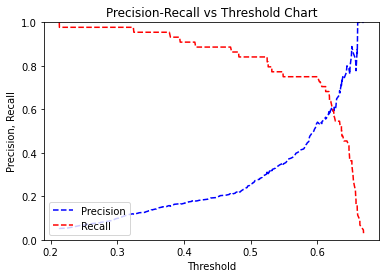

In [25]:
#generate a precision recall curve to check if we can change the threshold to increase FalseNegative.

from sklearn.metrics import precision_recall_curve
from sklearn import metrics

probs = cat_model.predict_proba(original_xtest)
positive_probs = probs[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(original_ytest, positive_probs) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


In [26]:
THRESHOLD = 0.37
thre_37_preds_cat = np.where(cat_model.predict_proba(x_val)[:,1] > THRESHOLD, 1, 0)

#check a classification
print(classification_report(y_val, thre_37_preds_cat))

print(pd.DataFrame(confusion_matrix(y_val, thre_37_preds_cat), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       528
           1       0.10      0.94      0.18        18

    accuracy                           0.72       546
   macro avg       0.55      0.83      0.50       546
weighted avg       0.97      0.72      0.81       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 374                 154
Actual Positive                   1                  17


In [27]:
thre_37_preds_cat = np.where(cat_model.predict_proba(original_xtest)[:,1] > THRESHOLD, 1, 0)

#check a classification
print(classification_report(original_ytest, thre_37_preds_cat))

print(pd.DataFrame(confusion_matrix(original_ytest, thre_37_preds_cat), columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1319
           1       0.15      0.95      0.26        44

    accuracy                           0.83      1363
   macro avg       0.58      0.89      0.58      1363
weighted avg       0.97      0.83      0.88      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1085                 234
Actual Positive                   2                  42


In [28]:
#check features' importance of this model
feat_imp_cat = cat_model.get_feature_importance(prettified=True)

important_features = feat_imp_cat.loc[feat_imp_cat['Importances'] > 0]
#important_features[0] = important_features[0].iloc[:,0]

important_features

,Feature Id,Importances
0,net income to total assets,10.974931
1,ROA(C) before interest and depreciation before...,10.602950
2,tax rate (A),9.431715
3,borrowing dependency,7.735259
4,per Net Share Value (B),6.955354
5,current liability to assets,6.548995
6,debt ratio %,6.199320
7,Net income to stockholder's Equity,5.740637
8,net worth/assets,4.674117
9,total expense /assets,3.959321


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xg = xgb.XGBClassifier(n_estimators=25, max_depth=8, learning_rate=0.1, subsample=0.5, scale_pos_weight=30, use_label_encoder=False, objective = 'binary:logistic', seed=0)
xg_model = xg.fit(x_train,y_train)
xg_preds = xg_model.predict(x_val)
print(classification_report(y_val, xg_preds))

#create a confusion matrix using the validation set
print(pd.DataFrame(confusion_matrix(y_val, xg_preds), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

[19:29:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       528
           1       0.27      0.39      0.32        18

    accuracy                           0.95       546
   macro avg       0.62      0.68      0.64       546
weighted avg       0.96      0.95      0.95       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 509                  19
Actual Positive                  11                   7


In [30]:
xg_pred = xg_model.predict(original_xtest)

#check a classification
print(classification_report(original_ytest, xg_pred))

print(pd.DataFrame(confusion_matrix(original_ytest, xg_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1319
           1       0.44      0.66      0.53        44

    accuracy                           0.96      1363
   macro avg       0.71      0.82      0.75      1363
weighted avg       0.97      0.96      0.97      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1282                  37
Actual Positive                  15                  29


(0.0, 1.0)

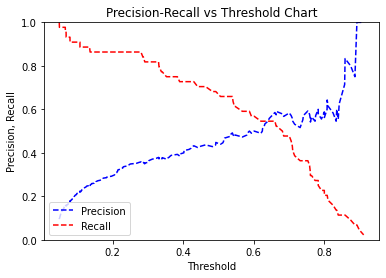

In [31]:
probs = xg_model.predict_proba(original_xtest)
positive_probs = probs[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(original_ytest, positive_probs) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [33]:
from sklearn.linear_model import LogisticRegression

#generate a logistics regression model

log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
log_model = log_reg.fit(x_train, y_train)
log_pred = log_model.predict(x_val)

from sklearn.metrics import classification_report

#check a classification
print(classification_report(y_val, log_pred))

print(pd.DataFrame(confusion_matrix(y_val, log_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       528
           1       0.16      0.94      0.27        18

    accuracy                           0.84       546
   macro avg       0.58      0.89      0.59       546
weighted avg       0.97      0.84      0.89       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 439                  89
Actual Positive                   1                  17


In [34]:
log_pred = log_model.predict(original_xtest)

#check a classification
print(classification_report(original_ytest, log_pred))

print(pd.DataFrame(confusion_matrix(original_ytest, log_pred), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1319
           1       0.26      0.89      0.41        44

    accuracy                           0.92      1363
   macro avg       0.63      0.90      0.68      1363
weighted avg       0.97      0.92      0.94      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                1210                 109
Actual Positive                   5                  39


In [35]:
#check coefficient
log_model.coef_[0]

array([-5.98406132, -2.45399101,  0.2222234 , -1.04247674, -8.70014172,
       -0.29078314, -1.15978946, -2.953574  , -5.15546299, -1.7638457 ,
        6.62767905, -6.62453619,  1.33787312, -3.26018134, -4.80777621,
        0.77448516, -0.61847342, -0.09681221, -2.89645895, -0.50268511,
        1.16545371, -0.80870428,  1.23302969, -0.16283334, -0.32926271])

(0.0, 1.0)

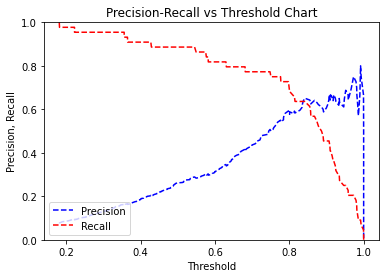

In [36]:
'''from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn import metrics'''

'''
positive_probs = probs[:, 1]

precision, recall, thresholds = precision_recall_curve(original_ytest, positive_probs)
f1, auc = f1_score(original_ytest, log_pred), auc(recall, precision)'''

probs = log_model.predict_proba(original_xtest)
positive_probs = probs[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(original_ytest, positive_probs) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [37]:
THRESHOLD = 0.25
thre_25_preds = np.where(log_model.predict_proba(x_val)[:,1] > THRESHOLD, 1, 0)

#check a classification
print(classification_report(y_val, thre_25_preds))

print(pd.DataFrame(confusion_matrix(y_val, thre_25_preds), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       528
           1       0.08      1.00      0.15        18

    accuracy                           0.62       546
   macro avg       0.54      0.81      0.45       546
weighted avg       0.97      0.62      0.74       546

                 Predicted Nagative  Predicted Positive
Actual Negative                 323                 205
Actual Positive                   0                  18


In [38]:
thre_25_preds = np.where(log_model.predict_proba(original_xtest)[:,1] > THRESHOLD, 1, 0)

#check a classification
print(classification_report(original_ytest, thre_25_preds))

print(pd.DataFrame(confusion_matrix(original_ytest, thre_25_preds), columns = ['Predicted Nagative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1319
           1       0.10      0.95      0.19        44

    accuracy                           0.73      1363
   macro avg       0.55      0.84      0.51      1363
weighted avg       0.97      0.73      0.82      1363

                 Predicted Nagative  Predicted Positive
Actual Negative                 954                 365
Actual Positive                   2                  42
